##### **模型评估与改进**
+ 评估指标
    + 正确率-score： 计算正确分类的所占的比例;
    + 交叉验证分数-cross_val_score：模型的泛化性;

###### **交叉验证**

In [178]:
import warnings

import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression

In [179]:
iris = load_iris()

lr = LogisticRegression(max_iter=500)
score = cross_val_score(lr,iris['data'],iris['target'],cv = 5)
print("cross validation score:{}".format(score))
'''
默认情况下cross_val_score 执行3折交叉验证,返回3个精度,可通过cv参数控制折数
总结交叉验证精度的常用方法是计算平局值
'''
print("mean of cross validation score :{:.3f}".format(score.mean()))

cross validation score:[0.96666667 1.         0.93333333 0.96666667 1.        ]
mean of cross validation score :0.973


###### **交叉验证的优点及缺点**
+ 可以客观衡量模型的泛化性;
+ 可以大致观察到模型的上限和下限;
+ 对数据的使用更加高效;
------------------------------------------
+ 增加了计算成本

###### **分层K折交叉验证和其他策略**
+ 分层交叉验证可以确保抽样数据的标签分布可以和总体的标签分布一致;
+ 分层k折交叉验证示意图如下;

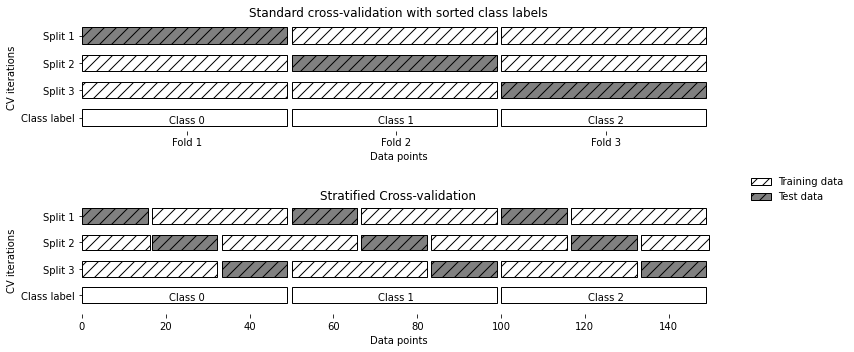

In [180]:
mglearn.plots.plot_stratified_cross_validation()

In [181]:
## 对交叉验证的更多控制
# 交叉验证分离器 -KFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) 


score = cross_val_score(lr,iris['data'],iris['target'],cv = kfold)
print("cross validation score:{}".format(score))

cross validation score:[1.         1.         0.86666667 0.93333333 0.83333333]


In [182]:
kfold = KFold(n_splits=3) 


score = cross_val_score(lr,iris['data'],iris['target'],cv = kfold)
print("kfold of cross validation score:{}".format(score))
'''
因为在iris数据中,每一这都对应一个类别,因此学不到东西,所以分数为零
可以将数据打乱来代替分层解决这种问题
通过shuffle 可以实现
'''

kfold of cross validation score:[0. 0. 0.]


'\n因为在iris数据中,每一这都对应一个类别,因此学不到东西,所以分数为零\n可以将数据打乱来代替分层解决这种问题\n通过shuffle 可以实现\n'

In [183]:
kfold = KFold(n_splits=3,shuffle=True,random_state=0) 


score = cross_val_score(lr,iris['data'],iris['target'],cv = kfold)
print("cross validation score:{}".format(score))

cross validation score:[0.98 0.96 0.96]


###### **留一交叉验证法**
+ 可以将留一交叉验证法看做每折只包含单个样本的k折交叉验证;
+ 对大型数据集来说可能非常耗时,但在小型数据集上可能给出更好估计结果;

In [184]:
from sklearn.model_selection import LeaveOneOut

In [185]:
loo = LeaveOneOut()
score = cross_val_score(lr,iris['data'],iris['target'],cv = loo)

print("number of ac iterations:{}".format(len(score)))
print("loo of  cross validation score:{:.2f}".format(score.mean()))

number of ac iterations:150
loo of  cross validation score:0.97


###### **打乱划分交叉验证**
+ 在打乱划分交叉验证中,每次划分为训练集取样train_size个点,为测试集取样test_size个(不相交)点.将这一划分方法重复n_iter次;
+ 示意图如下:

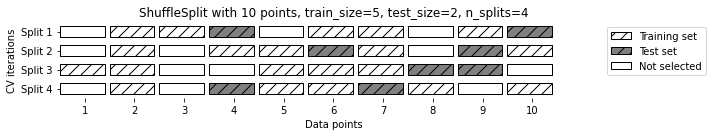

In [186]:
mglearn.plots.plot_shuffle_split()

In [187]:
from sklearn.model_selection import ShuffleSplit

In [188]:
shuff_split = ShuffleSplit(test_size=0.5,train_size=0.5,n_splits = 10)
score = cross_val_score(lr,iris['data'],iris['target'],cv = shuff_split)

print("shuff_split of  cross validation score:{:.2f}".format(score.mean()))

shuff_split of  cross validation score:0.96


###### **分组交叉验证**
+ 适用于数据的分组高度相关;
+ 分组交叉验证示意图;

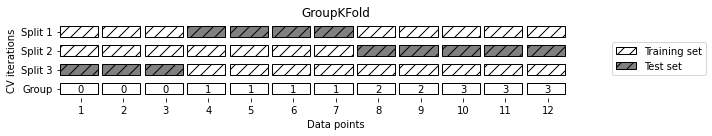

In [189]:
mglearn.plots.plot_group_kfold()

In [190]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

In [191]:
X,y = make_blobs(n_samples=12,random_state=0)

groups = [0,0,0,1,1,1,2,2,2,3,3,3]
score = cross_val_score(lr,X,y,groups,cv = GroupKFold(n_splits=3))

print("shuff_split of  cross validation score:{:.2f}".format(score.mean()))

shuff_split of  cross validation score:0.72


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


##### **网格搜索**
+ 调参手段;

In [192]:
# 简单的网格搜索
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [193]:
Xtrain ,Xtest ,ytrain,ytest = train_test_split(iris['data'],iris['target'],random_state = 0)
best_score = 0 
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #对每种训练参数都训练一个svm
        svm = SVC(gamma=gamma ,C = C)
        svm.fit(Xtrain,ytrain)
        score = svm.score(Xtest,ytest)
        
        if score>best_score:
            best_score =score
            best_parameters = {"C":C,"gamma":gamma}
print("best score:{:.2f}".format(best_score))
print("best parameters:{}".format(best_parameters))

best score:0.97
best parameters:{'C': 100, 'gamma': 0.001}


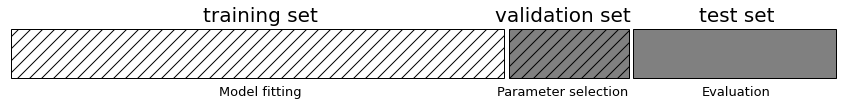

In [194]:
### 参数过拟合的风险与验证集

# 即将数据集划分成训练集，测试集，验证集

mglearn.plots.plot_threefold_split()

In [195]:
# 将数据划分成训练集+验证集与测试集
Xtrainval,Xtest,ytrainval,ytest = train_test_split(iris['data'],iris['target'],random_state = 0)

# 将训练+验证集划分成训练集和验证集
Xtrain ,Xvalid ,ytrain,yvalid = train_test_split(Xtrainval,ytrainval,random_state=1)

best_score = 0 
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #对每种训练参数都训练一个svm
        svm = SVC(gamma=gamma ,C = C)
        svm.fit(Xtrain,ytrain)
        score = svm.score(Xvalid,yvalid)
        
        if score>best_score:
            best_score =score
            best_parameters = {"C":C,"gamma":gamma}
            
            
svm = SVC(**best_parameters)
svm.fit(Xtrainval,ytrainval)
score = svm.score(Xtest,ytest)
print("best score:{:.2f}".format(best_score))
print("best parameters:{}".format(best_parameters))
print("best score:{:.2f}".format(score))

best score:0.96
best parameters:{'C': 10, 'gamma': 0.001}
best score:0.92


In [196]:
# 对上述过程的解释
'''
验证集上的最高分数是96%，较之前略低，可能是因为我们使用了更少的数据来训练模型
但在测试集上的分数更低，92%，因此我们只能说有92%的新数据正确分类了 
严格来说在测试集上对一个模型进行评估并选择最好的那个，会导致对模型精度过于乐观的估计
'''

'\n验证集上的最高分数是96%，较之前略低，可能是因为我们使用了更少的数据来训练模型\n但在测试集上的分数更低，92%，因此我们只能说有92%的新数据正确分类了 \n严格来说在测试集上对一个模型进行评估并选择最好的那个，会导致对模型精度过于乐观的估计\n'

###### **带交叉验证的网格搜索**

In [197]:
# 将数据划分成训练集+验证集与测试集
Xtrainval,Xtest,ytrainval,ytest = train_test_split(iris['data'],iris['target'],random_state = 0)

# 将训练+验证集划分成训练集和验证集
Xtrain ,Xvalid ,ytrain,yvalid = train_test_split(Xtrainval,ytrainval,random_state=1)

best_score = 0 
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #对每种训练参数都训练一个svm
        svm = SVC(gamma=gamma ,C = C)
        svm.fit(Xtrain,ytrain)
        score = cross_val_score(svm,Xtrainval,ytrainval,cv=5)
        score =np.mean(score)
        if score>best_score:
            best_score =score
            best_parameters = {"C":C,"gamma":gamma}
            
            
svm = SVC(**best_parameters)
svm.fit(Xtrainval,ytrainval)
score = cross_val_score(svm,Xtest,ytest,cv=5)
score =np.mean(score)
print("best score:{:.2f}".format(best_score))
print("best parameters:{}".format(best_parameters))
print("best score:{:.2f}".format(score))

best score:0.97
best parameters:{'C': 10, 'gamma': 0.1}
best score:0.92


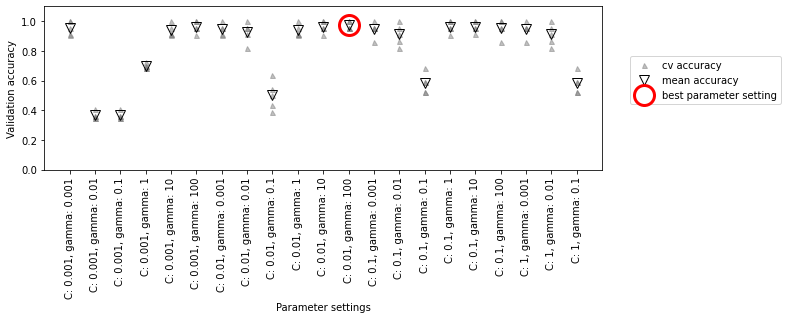

In [198]:
# 上述代码运行过程的可视化
mglearn.plots.plot_cross_val_selection()

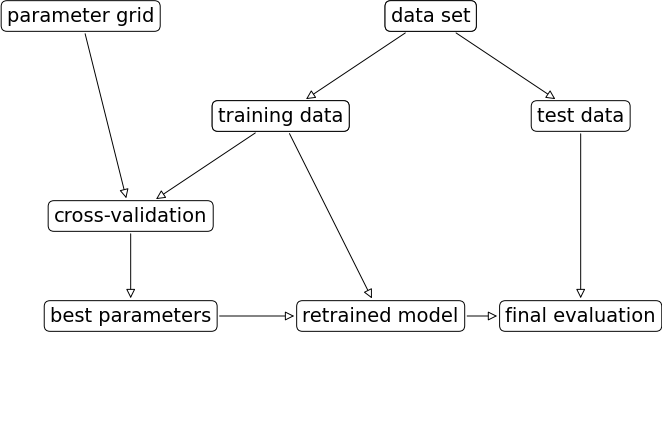

In [199]:
# 带交叉验证的网格搜索运行过程
mglearn.plots.plot_grid_search_overview()

In [200]:
# sklearn 中的网格搜索 GridSearchCV
'''
使用过程：
实例化网格搜索、估计器
创建参数字典

进行网格搜索
'''

from sklearn.model_selection import GridSearchCV

In [201]:
param_grid = {
    "C":[0.001,0.01,0.1,1,10,100],
    "gamma":[0.001,0.01,0.1,1,10,100]
}                               ## 参数网格

grid = GridSearchCV(svm,param_grid=param_grid,cv = 5) # 实例化
Xtrain ,Xtest ,ytrain,ytest = train_test_split(iris['data'],iris['target'],random_state = 0)
grid.fit(Xtrain,ytrain)
print("test set score:{:.3f}".format(grid.score(Xtest,ytest)))
print("best param dict:{}".format(grid.best_params_))
print("best score:{:.3f}".format(grid.best_score_))
print("best estimators:\n{}".format(grid.best_estimator_))

'''
best_score_ 与 score方法的区别
best_score_ 属性保存的是交叉验证的平均精度
score 是在整个训练集训练的模型
grid 本身具有predic 和 score 方法，所以不用best_estimator 来进行评估和预测
'''

test set score:0.974
best param dict:{'C': 10, 'gamma': 0.1}
best score:0.973
best estimators:
SVC(C=10, gamma=0.1)


'\nbest_score_ 与 score方法的区别\nbest_score_ 属性保存的是交叉验证的平均精度\nscore 是在整个训练集训练的模型\ngrid 本身具有predic 和 score 方法，所以不用best_estimator 来进行评估和预测\n'

In [202]:
# 交叉验证的结果
pd.DataFrame(grid.cv_results_).head()
np.array(results['mean_test_score']).shape

(36,)

'\n热图中的每个点对应于运行一次交叉验证结果以及一种特定的参数设置,浅色表示高精度,深色表示低精度;\n可以看到 SVC对参数敏感,对于许多种参数设置, 精度都在40%左右,对于其他设置,精度约为96%\n'

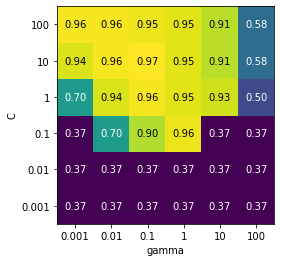

In [203]:
##
results = grid.cv_results_
scores = np.array(results['mean_test_score']).reshape(6,6)
# 对交叉验证平均分数作图

mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],ylabel = 'C',yticklabels=param_grid["C"],cmap = "viridis")

# 
'''
热图中的每个点对应于运行一次交叉验证结果以及一种特定的参数设置,浅色表示高精度,深色表示低精度;
可以看到 SVC对参数敏感,对于许多种参数设置, 精度都在40%左右,对于其他设置,精度约为96%
'''

In [204]:
#在非网格空间搜索
# GridSearchCV 的 param_grid参数应该是一个有字典组成列表，列表中的字典可以扩展为一个单独的网格

param_grid = [{
    "kernel":["rbf"]
     ,"C":[0.001,0.01,0.1,1,10,100]
     ,"gamma":[0.001,0.01,0.1,1,10,100]
    },
    {
      "kernel":["linear"]
    ,"C":[0.001,0.01,0.1,1,10,100]
    ,"gamma":[0.001,0.01,0.1,1,10,100]    
    }
]

grid_search = GridSearchCV(SVC(),param_grid=param_grid,cv= 5)
grid_search.fit(Xtrain,ytrain)

print("best parameters :{}".format(grid_search.best_params_))
print("best cross- validation score:{:.2f}".format(grid_search.best_score_))

best parameters :{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best cross- validation score:0.97


In [205]:
# 查看cv_results_
res=pd.DataFrame(grid_search.cv_results_)
res[res['param_kernel']=='linear'].head(10)

# 当kernel 等于linear是只有C是变化的???  这里没看明白，不是只有gamma是变化的吗

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.000399,0.000489,0.000199,0.000399,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,52
37,0.000199,0.000399,0.000000,0.000000,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,52
38,0.000199,0.000399,0.000199,0.000399,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,52
39,0.000399,0.000489,0.000199,0.000399,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,52
40,0.000804,0.000402,0.000000,0.000000,0.001,10,linear,"{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,52
41,0.000400,0.000489,0.000200,0.000401,0.001,100,linear,"{'C': 0.001, 'gamma': 100, 'kernel': 'linear'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,52
42,0.000199,0.000399,0.000199,0.000397,0.01,0.001,linear,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}",0.869565,0.869565,0.772727,0.772727,0.909091,0.838735,0.055794,41
43,0.000193,0.000386,0.000399,0.000489,0.01,0.01,linear,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.869565,0.869565,0.772727,0.772727,0.909091,0.838735,0.055794,41
44,0.000399,0.000489,0.000205,0.000410,0.01,0.1,linear,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.869565,0.869565,0.772727,0.772727,0.909091,0.838735,0.055794,41
45,0.000399,0.000489,0.000200,0.000399,0.01,1,linear,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}",0.869565,0.869565,0.772727,0.772727,0.909091,0.838735,0.055794,41


In [206]:
## 使用不同的交叉验证策略进行网格搜索
# 嵌套交叉验证
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris['data'],iris['target'],cv = 5)

print("cross-validation score:",scores)
print("mean cross-validation scores:{:.2f}".format(scores.mean()))


# 嵌套交叉验证的结果可以总结为“SVC在iris数据集上的交叉验证平均精度是98%”

# 说明： 这里内层和外层分别使用了分层5折交叉验证,因为param_grid 办函36中参数组合，所以这里要构建36*5*5 = 900 个模型，导致嵌套交叉验证的过程代价很高

cross-validation score: [0.96666667 1.         0.9        0.96666667 1.        ]
mean cross-validation scores:0.97


In [207]:
# 辅助理解上述过程

def nested_cv(X,y,inner_cv,outer_cv,Classifier,parameter_grid):
    # 外层分数储存容器
    outer_scores = []
    
    # 对于外层交叉验证的每次数据划分，split方法返回索引值
    for training_sample,test_samples in outer_cv.split(X,y):
        # 利用内层交叉验证找到最忌参数
        best_parms = {}
        # np中表示无穷小的方式
        best_scores = -np.inf
        # 遍历参数
        for parameters in parameter_grid:
            # 在内层累计分数
            cv_scores = []
            # 遍历内层交叉验证
            for inner_train,inner_test in inner_cv.split(X[training_sample],y[training_sample]):
                # 对于给定参数和训练数据来构建分类器
                clf = Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                
                # 在内层数据集上进行评估
                score = clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            # 计算内层平均分数
            mean_score = np.mean(cv_scores)
            if mean_score >best_scores:
                # 如果比前面的模型都要好，保留参数
                best_score = mean_score
                best_parms = parameters
                
        # 利用外层训练集和最佳参数来构建模型
        clf = Classifier(**best_parms)
        clf.fit(X[training_sample],y[training_sample])
        
        # 评估模型
        outer_scores.append(clf.score(X[test_samples],y[test_samples]))
    return np.array(outer_scores)

In [208]:
from sklearn.model_selection import ParameterGrid,StratifiedKFold
scores = nested_cv(iris['data'],iris['target'],StratifiedKFold(5),StratifiedKFold(5),SVC,ParameterGrid(param_grid))
scores

array([1.        , 1.        , 0.9       , 0.93333333, 1.        ])

In [209]:
# 交叉验证与网络搜索并行--高效利用cpu
# 通关n_jobs 参数来控制
# sklearn 中不允许并行操作的嵌套

In [210]:
#

##### **<fornt size =10>评估指标与评分</font>**
+ 目前为止所使用的的评估指标：
    + 分类问题：精度
    + 回归问题：R^2
+ 牢记最终目标：
    + 面向业务

###### **二分类指标**
+ <font size = 1>错误类型</font>
    + <font size = 1>假正类：将反类的特征划分为正类</font>
    + <font size = 1>假反类：将正类的特征划分为反类</font>
+ <font size = 1>不平衡的数据集</font>
    + <font size = 1>一个类别出现的次数比另一个多很多</font>

In [211]:
### 不平衡数据集举例 
from sklearn.datasets import load_digits

dights = load_digits()

y = dights['target'] ==9 
Xtrain,Xtest,ytrain,ytest = train_test_split(dights['data'],y,random_state =0 )
### 使用dummyclassifier来始终预测多数类，已查看提供的信息量有多么少

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(Xtrain,ytrain)
pred_most_frequent = dummy_majority.predict(Xtest)

print("unique prendict label :{}".format(np.unique(pred_most_frequent)))
print("test score :{:.2f}".format(dummy_majority.score(Xtest,ytest)))


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(Xtrain,ytrain)
print("test score:{:.2f}".format(tree.score(Xtest,ytest)))

unique prendict label :[False]
test score :0.90
test score:0.92


In [212]:
# 使用其他模型来试一下
dummy = DummyClassifier().fit(Xtrain,ytrain)
pred_dummy = dummy.predict(Xtest)
print("score of dummy:{:.2f}".format(dummy.score(Xtest,ytest)))


logreg = LogisticRegression( C = 0.1,max_iter=500).fit(Xtrain,ytrain)
pred_log = logreg.predict(Xtest)
print("score of dummy:{:.2f}".format(logreg.score(Xtest,ytest)))

score of dummy:0.81
score of dummy:0.98


C:\Users\admin\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [213]:
# 上述过程解释的问题： 在使用的三种模型中，随机产生的分类器的精度是最低的，但是也达到了80% 但是却没有学到任何内容；
# 此时精度对于模型评估的帮助显示不是很有参考性
# 此时需要其他帮助衡量模型的指标

In [214]:
# 混淆矩阵

from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(ytest,pred_log)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

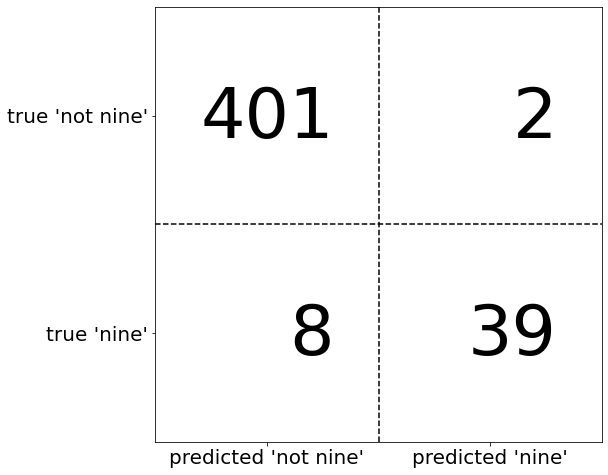

In [215]:
# 混淆矩阵的含义
mglearn.plots.plot_confusion_matrix_illustration()

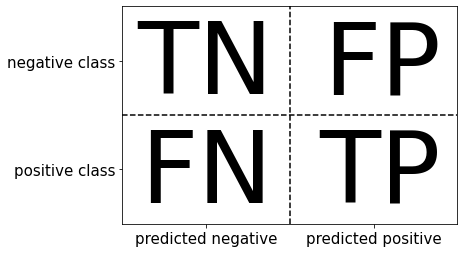

In [216]:
mglearn.plots.plot_binary_confusion_matrix()

In [217]:
## 使用混淆矩阵计算一些指标
# 精度 accuracy 
# accuracy = (TP+TN)/(TN+TP+TN+TP) 表示正确预测的数量，

# 准确率  precision 
# precision = TP/(TP+FP) 表示被预测为正例的样本有多少是真正的正例，如果目标是显示假正例的数量,那么可以使用precision作为性能指标

# 召回率 recall
# recall = TP/(TP+FN)  正类样本中有多少被预测为正类，如果需要我们找到所以正类，即避免假类可以使用recall


# f-分数 准确率和召回率汇总度量
# F = (precision*recall/(precision+recall))*2  对于不平衡的二类数据集是一种比精度更好的度量


#可以使用 metric。classification_report 来对混淆矩阵计算着这三个指标

In [218]:
from sklearn.metrics import classification_report

print(classification_report(ytest,pred_most_frequent,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


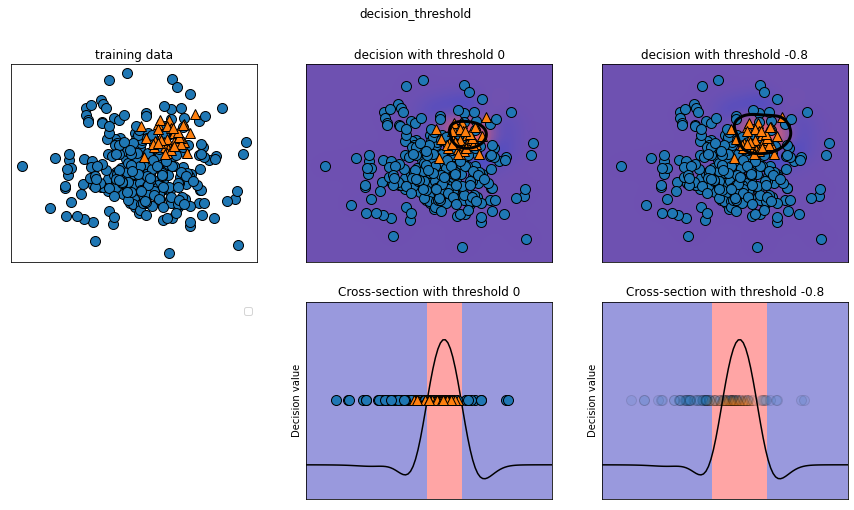

In [219]:
# 考虑不确定性 
# decision_function 和 predict_proba

# 举例 
from mglearn.datasets import make_blobs

X,y = make_blobs(n_samples=(400,50),centers = 2,cluster_std = [7.0,2],random_state = 22)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)
svc = SVC(gamma=0.05).fit(Xtrain,ytrain)

mglearn.plots.plot_decision_threshold()

In [220]:
print(classification_report(ytest,svc.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [221]:
# 通过改变阈值来改变分类的偏重
# 如果我们希望类别1（占比小的类别）的召回率更高，我们可以减小阈值,默认情况下decision_function值大于0的点将被化为类别1 

y_pred_lower_threshold = svc.decision_function(Xtest)>-0.8
y_pred_lower_threshold
print(classification_report(ytest,y_pred_lower_threshold))

# 阈值减小后 召回率上升， 如果认为准确率比召回率更重要，则反过来，或者你的数据严重不平衡,那么改变决策阈值是得到更好结果的简单方法,
# 由于decision_function 的取值可以在任意范围,所以很难提供关于如何选取阈值的经验法则

# 如果你设置了阈值，那么要小心不要在测试机集上这么做，与其他参数一样，在测试集上设置决策阈值可能会得到过于乐观的结果，可以使用验证集或者交叉验证来代替

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [222]:
##  准确率-召回率曲线（precision-recall-curve）

# 在实际开发中，不知道工作点在哪里的情况下，回事用准确率-召回率曲线来同时查看所有可能的阈值或准确率和召回率所有可能的折中；

from sklearn.metrics import precision_recall_curve

precison, recall ,threshold = precision_recall_curve( ytest,svc.decision_function(Xtest))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


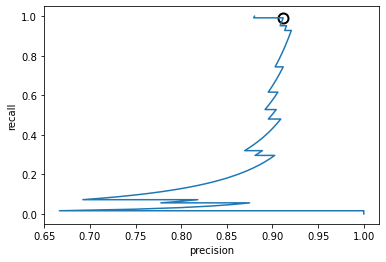

In [223]:
#使用更多数据点是曲线平滑
X,y = make_blobs(n_samples=(400,500),centers=2,cluster_std=[7.0,2],random_state=22)
Xtrain,Xtest ,ytrain,ytest = train_test_split(X,y,random_state=0)

svc = SVC(gamma=0.5).fit(Xtrain,ytrain)
precison, recall ,threshold =precision_recall_curve(ytest,svc.decision_function(Xtest))

#  找到最接近于0 的阈值
close_zero = np.argmin(np.abs(threshold))

plt.plot(precison[close_zero],recall[close_zero],"o",markersize=10,label="threshold zero",fillstyle = "none",c ="k",mew = 2)
plt.plot(precison,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.show()

In [224]:
## 对曲线的解释：曲线上的每一个点都对应一个decision_function 的一个可能阈值，黑色圆圈是阈值为零的点，0是decision_function的默认阈值 ,这个点是在调用predict 方法是选择的折中点

# 曲线越靠近右上角则分类器越好，右上角的点表示对于同一个阈值，准曲率和召回率都很高,曲线从左上角开始，这里对应于非常低的阈值，
# 将所有样本都化为正类，提高阈值可以让曲线想准确率更好的方向移动，但同时召回率降低，继续增大阈值，大多数被划分正类的点都是真正例 此时模型的准确率很高，但是召回率更低
# 随着准确率的升高，模型越能够保持较高的招呼率则模型越好

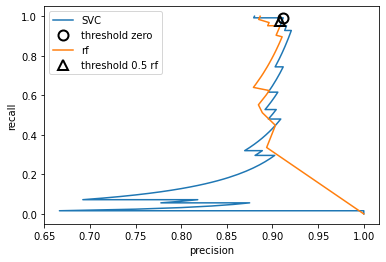

In [225]:
# 举例：不同模型下相同数据的相同数据下的准确率-召回率曲线
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(Xtrain,ytrain)
# rf没有descision_function ,只有predict_proba 
precision_rf ,recall_rf ,threshold_rf = precision_recall_curve(ytest,rf.predict_proba(Xtest)[:,1])
plt.plot(precison,recall,label="SVC")
plt.plot(precison[close_zero],recall[close_zero],"o",markersize=10,label="threshold zero",fillstyle = "none",c ="k",mew = 2)


plt.plot(precision_rf,recall_rf,label="rf")
closs_default_rf = np.argmin(np.abs(threshold_rf-0.5))
plt.plot(precision_rf[closs_default_rf],recall[closs_default_rf],"^",c="k",markersize=10,label="threshold 0.5 rf",fillstyle="none",mew=2)

plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.show()

In [228]:
# 单一比较模型f1 分数
from sklearn.metrics import f1_score
print("f1 score of svm:{:.2f}".format(f1_score(ytest,svc.predict(Xtest))))
print("f1 score of rf:{:.2f}".format(f1_score(ytest,rf.predict(Xtest))))

f1 score of svm:0.95
f1 score of rf:0.93


In [230]:
# roc曲线和auc面积（常用工具）
# roc曲线考虑了给定分类器的所有可能的阈值，但是它显示的假正例率（false positive rate FPR）和真正例率（true positive rate TPR） 
# FPR = FP/(FP+TN)
# 可以使用 roc_curve 函数来计算roc曲线

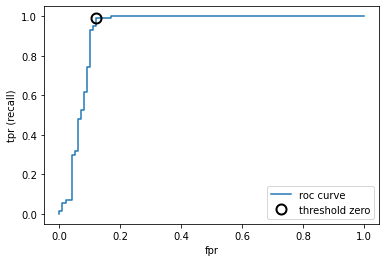

In [234]:
from sklearn.metrics import roc_curve
fpr,tpr ,threshold = roc_curve(ytest,svc.decision_function(Xtest))
plt.plot (fpr,tpr,label = "roc curve")
plt.xlabel("fpr")
plt.ylabel("tpr (recall)")

# 找到最接近于0的UI之
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero],tpr[close_zero],"o",markersize=10,label = 'threshold zero',fillstyle = "none",c="k",mew=2)
plt.legend(loc=4)
plt.show()

In [235]:
### 对上图的解释
# 理想的roc曲线要靠近左上角；同样请注意 不要在测试集上选择阈值，而是单独在验证集上选择阈值；

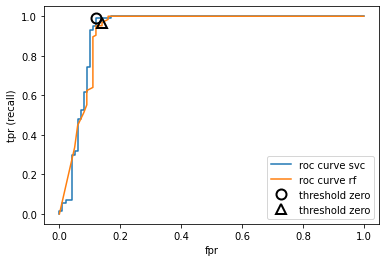

In [237]:
fpr_rf,tpr_rf ,threshold_rf = roc_curve(ytest,rf.predict_proba(Xtest)[:,1])
fpr,tpr ,threshold = roc_curve(ytest,svc.decision_function(Xtest))

plt.plot (fpr,tpr,label = "roc curve svc ")
plt.plot (fpr_rf,tpr_rf,label = "roc curve rf ")

plt.xlabel("fpr")
plt.ylabel("tpr (recall)")

# 找到最接近于0的UI之
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero],tpr[close_zero],"o",markersize=10,label = 'threshold zero',fillstyle = "none",c="k",mew=2)


close_default_rf = np.argmin(np.abs(threshold-0.5))
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],"^",markersize=10,label = 'threshold zero',fillstyle = "none",c="k",mew=2)
plt.legend(loc=4)
plt.show()

In [240]:
# auc 面积 
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(ytest,rf.predict_proba(Xtest)[:,1])
svc_auc = roc_auc_score(ytest,svc.decision_function(Xtest))

print("auc for rf：{:.3f}".format(rf_auc))
print("auc for svc：{:.3f}".format(svc_auc))

# 对于样本不均衡问题 auc 是一个毕竟度好的多指标；
# 建议在不均衡问题上优先使用auc ，但要注意auc没有默认阈值，因此为了从高auc的模型得到有用的分类结果，可能还要调节决策阈值；

auc for rf：0.927
auc for svc：0.930


###### 多分类指标
+ 常用工具: 精度，混淆矩阵和分类报告

In [251]:
# 举例： digits 数据上应用
from sklearn.metrics import accuracy_score 
Xtrain,Xtest,ytrain,ytest = train_test_split(dights['data'],dights['target'],random_state=0)
lr = LogisticRegression(max_iter=200).fit(Xtrain,ytrain)

pred = lr.predict(Xtest)
print("Accuracy score:{:.3f}".format(accuracy_score(ytest,pred)))
print("confusion metrics\n{}".format(confusion_matrix(ytest,pred)))

Accuracy score:0.953
confusion metrics
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
# 利用classification_report 函数可以计算每个类别的准确率
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [253]:
## 对于多分类问题中的不平衡数据集
# 最常用的指标就是多分类版本的f分数，多分类f-分数背后的思想是：对于每个类别计算一个二分类f-分数，其中该类别是正类，其他所有类别是反类，然后，使用以下策略对这些按类别f-分数进行平均
# 宏(mecro)平均：计算为加权的按类别f-分数，它对所有类别给出相同的权重，无论类别中样本占比大小
# 加权(weighted):以每个类别的支持作为权重来计算按类别f-分数的平均值,分类报告中给出的就是这个值
# 微(micro)平均:计算所有类别中的假正类，假反类和真正类的总数，然后利用这些计数来计算准确率，召回率，f-分数

In [255]:
print("micro average f1 score:{:.3f}".format(f1_score(ytest,pred,average="micro")))
print("micro average f1 score:{:.3f}".format(f1_score(ytest,pred,average="macro")))

micro average f1 score:0.953
micro average f1 score:0.954


##### 回归指标
+ 使用默认R^2就可以

In [256]:
##在模型选择中使用评估指标

# 希望在GridSearchCV 和 Cross_val_score 进行模型选择过程中是用auc等指标
# 我们可以通过scoring参数 来使用指定的评估指标


In [257]:
# 举例： 
print("Defalut scoring :{}".format(cross_val_score(SVC(),dights['data'],dights['target']==9)))
print("Defalut scoring :{}".format(cross_val_score(SVC(),dights['data'],dights['target']==9,scoring="accuracy")))
print("Defalut scoring :{}".format(cross_val_score(SVC(),dights['data'],dights['target']==9,scoring="roc_auc")))
            

Defalut scoring :[0.975      0.99166667 1.         0.99442897 0.98050139]
Defalut scoring :[0.975      0.99166667 1.         0.99442897 0.98050139]
Defalut scoring :[0.99717078 0.99854252 1.         0.999828   0.98400413]
